<a href="https://colab.research.google.com/github/timoshenko4618/data-analysis/blob/main/Analysis_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

In [ ]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars = ['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [ ]:
print(df[['A','C']])

    A   C
0  25  30
1  30  29
2  28  33
3  36  37
4  29  27


In [ ]:
t = (df['A'].mean() - df['C'].mean()) / (df['A'].std()**2/df['A'].count() +
                                         df['C'].std()**2/df['C'].count())**0.5
t

-0.6374552583116758

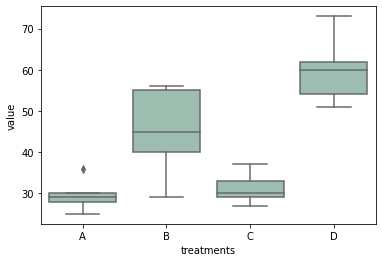

In [ ]:
ax = sns.boxplot(x = 'treatments', y = 'value', data = df_melt, color = '#99c2b2')
plt.show()

In [ ]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [ ]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length']
sam2 = data.loc[:half, 'Length']

stats.ttest_ind(sam2, sam1)

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [ ]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


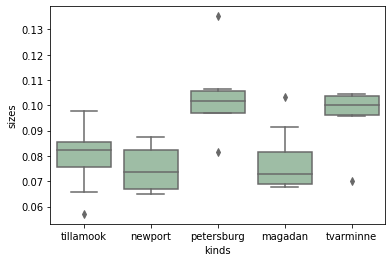

In [ ]:
import seaborn as sns  # Еще одна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = tillamook + newport +petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

In [ ]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]*5  # Некий общий элемент
group_1 = group*5
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]*5

# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=6250.000, p=0.000
Разные распределения (отвергаем H0)


21.0 22.75


(array([10.,  0.,  0., 10.,  5., 10., 10.,  5.,  0., 10.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <a list of 10 Patch objects>)

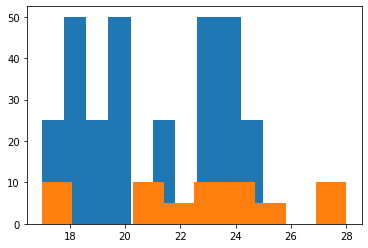

In [ ]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2)



---



# Задание 1
Вам даны результаты проверки двух препаратов.

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

df_data = pd.DataFrame(list(zip(A, B)), columns=['A', 'B']) 
#A, B, dframe


df_data_melt = pd.melt(df_data.reset_index(), id_vars=['index'], value_vars = ['A', 'B'])
df_data_melt.columns = ['index', 'препараты', 'результат']

stat, pval = stats.ttest_ind(B, A)

In [ ]:
print('Тест Стьюдента:\n ','Statistics=%.3f, p=%.3f' % (stat, pval))

if pval < 0.05:
  print('Различие в эффектах у пациентов существует (нулевая гипотеза отклоняется)')
else:
  print('Различие в эффектах у пациентов отсутствует (нулевая гипотеза подверждается)') 

Тест Стьюдента:
  Statistics=1.734, p=0.085
Различие в эффектах у пациентов отсутствует (нулевая гипотеза подверждается)


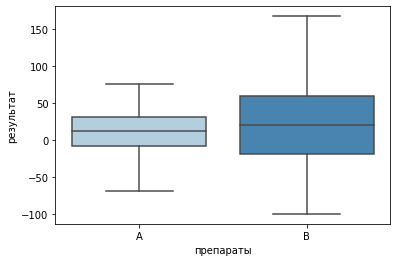

In [ ]:
ax = sns.boxplot(x = 'препараты', y = 'результат', data = df_data_melt, palette="Blues")
plt.show()



---



# Задание 2

Задание № 2 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой.

Используя дисперсионный анализ, сделайте выводы о распределениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [1]:
from scipy.stats import f_oneway

In [2]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [20]:
alpha = 0.05

F_nut, p_nut = f_oneway(nutri, water)
F_min, p_min = f_oneway(mineral, water)

def effect(pval):
  if pval < 0.05:
    print('Эффект есть')
  else:
    print('Эффекта нет') 

    
print('Удобрения: ','Statistics=%.3f, p=%.3f' % (F_nut, p_nut))
effect(p_nut)

print('Минералка: ','Statistics=%.3f, p=%.3f' % (F_min, p_min))
effect(p_min)

Удобрения:  Statistics=17.075, p=0.000
Эффект есть
Минералка:  Statistics=0.010, p=0.920
Эффекта нет


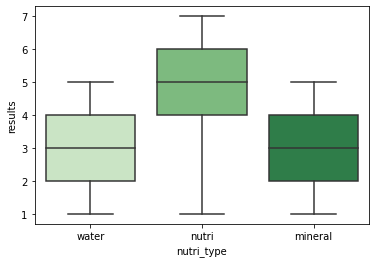

In [14]:
import seaborn as sns
 
results = water + nutri + mineral
nutri_type = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['results'] = results
df_mid['nutri_type'] = nutri_type

ax = sns.boxplot(x='nutri_type', y='results', data=df_mid, palette="Greens")
plt.show()